<center><h1>Random Forest</h1></center>

 - A Random Forest é melhor comparada à árvore de decisão para ORDENAR a base;

   - Caso particular de <u>ensemble</u> de modelos
   



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('alcoolismo_infantil.csv')
df

,goout,absences,target
0,4,6,0
1,3,4,0
2,2,10,0
3,2,2,0
4,2,4,0
...,...,...,...
390,4,11,1
391,5,3,1
392,3,3,0
393,1,0,1


# Divisão em base de treino e base de teste

In [3]:
X = df.drop('target',axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30, random_state=61658)

In [4]:
X

,goout,absences
0,4,6
1,3,4
2,2,10
3,2,2
4,2,4
...,...,...
390,4,11
391,5,3
392,3,3
393,1,0


[Text(0.5, 0.8333333333333334, 'X[0] <= 3.5\ngini = 0.332\nsamples = 276\nvalue = [218, 58]'),
 Text(0.25, 0.5, 'X[1] <= 13.0\ngini = 0.161\nsamples = 181\nvalue = [165, 16]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.125\nsamples = 164\nvalue = [153, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0.75, 0.5, 'X[0] <= 4.5\ngini = 0.493\nsamples = 95\nvalue = [53, 42]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.452\nsamples = 55\nvalue = [36, 19]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.489\nsamples = 40\nvalue = [17, 23]')]

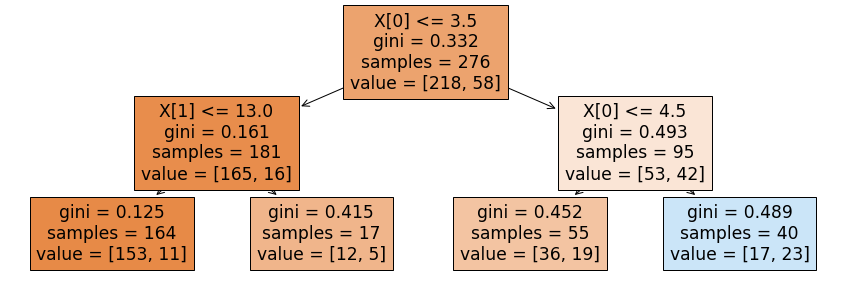

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=61658)
dt.fit(X_tr, y_tr)

from sklearn.tree import plot_tree

plt.figure(figsize=(15,5))
plot_tree(dt, filled=True)

### Visualizando a árvore de decisão colorida de acordo com as classes com `profundidade = 2`, logo teremos 4 possíveis regras.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=61658, n_estimators=2)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=61658)

## Aqui eu estimarei 2 possíveis árvores randômicas:

[Text(0.5, 0.8333333333333334, 'X[1] <= 12.5\ngini = 0.344\nsamples = 167\nvalue = [215, 61]'),
 Text(0.25, 0.5, 'X[1] <= 3.5\ngini = 0.299\nsamples = 144\nvalue = [201, 45]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.249\nsamples = 80\nvalue = [117, 20]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.354\nsamples = 64\nvalue = [84, 25]'),
 Text(0.75, 0.5, 'X[0] <= 4.5\ngini = 0.498\nsamples = 23\nvalue = [14, 16]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.496\nsamples = 16\nvalue = [12, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 7\nvalue = [2, 6]')]

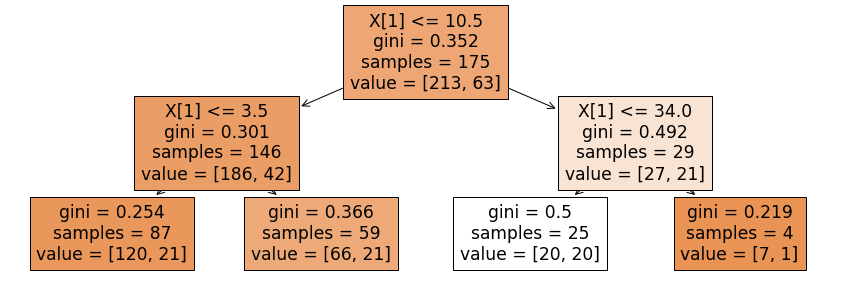

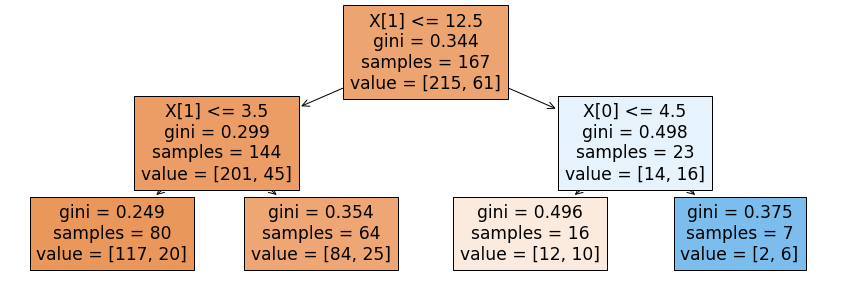

In [8]:
plt.figure(figsize=(15,5))
plot_tree(rf.estimators_[0],filled=True)
plt.figure(figsize=(15,5))
plot_tree(rf.estimators_[1],filled=True)

#### Comparação da Árvore de decisão (1º coluna) e a Random Forest (2º coluna) - Notamos que a Random Forest, por se tratar da média de diversas Árvores, quase sempre possui melhor precisão que a Árvore de Decisão.

In [9]:
from sklearn.metrics import roc_auc_score

max_depths = [2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    dt = DecisionTreeClassifier( max_depth=max_depth, random_state=61658 )
    rf = RandomForestClassifier( n_estimators=700, max_depth=max_depth, random_state=61658 )
    
    dt.fit(X_tr, y_tr)
    rf.fit(X_tr, y_tr)
    
    auc_dt = roc_auc_score(y_ts, dt.predict_proba(X_ts)[:,1])
    auc_rf = roc_auc_score(y_ts, rf.predict_proba(X_ts)[:,1])
    
    print( '{max_depth:2d} - {auc_dt:.3f} - {auc_rf:.3f}'.format(max_depth=max_depth,
                                                                 auc_dt=auc_dt,
                                                                 auc_rf=auc_rf,
                                                                ) )

 2 - 0.719 - 0.734
 3 - 0.689 - 0.730
 4 - 0.670 - 0.711
 5 - 0.683 - 0.700
 6 - 0.702 - 0.697
 7 - 0.651 - 0.687
 8 - 0.650 - 0.689
 9 - 0.647 - 0.689
10 - 0.647 - 0.688


In [10]:
dt = DecisionTreeClassifier(max_depth=2, random_state=61658)
rf = RandomForestClassifier(n_estimators=700, max_depth=2, random_state=61658)

dt.fit(X_tr, y_tr)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=2, n_estimators=700, random_state=61658)

In [11]:
alcool  = y==1
nalcool = y==0

/home/fernando_rosito/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


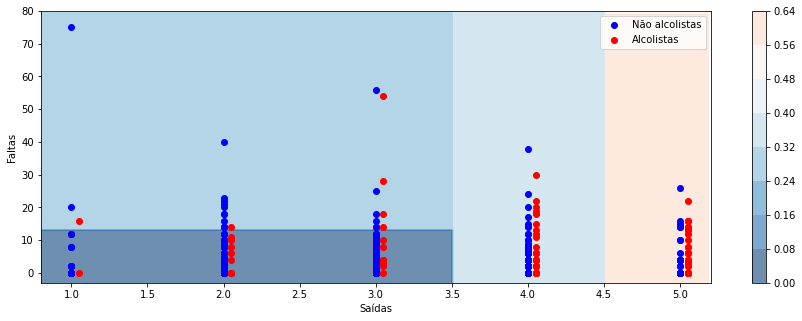

In [12]:
import numpy as np

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.5)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

## Plotagem de um gráfico com cores para cada propensão de cada aluno a ser alcolista. Segundo a Árvore de Decisão.

/home/fernando_rosito/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


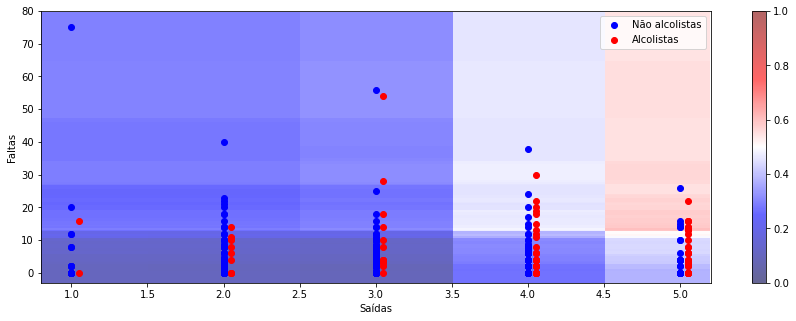

In [13]:
import numpy as np

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.5)
)
zz = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.pcolormesh(xx,yy,zz, cmap='seismic', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

## Plotagem de um gráfico com cores para cada propensão de cada aluno a ser alcolista. Segundo a Random Forest.

In [14]:
np.unique(dt.predict_proba(X)[:,1])

array([0.06707317, 0.29411765, 0.34545455, 0.575     ])

In [15]:
np.unique(rf.predict_proba(X)[:,1])

array([0.08849682, 0.08925165, 0.09120446, 0.09657374, 0.09732857,
       0.09916579, 0.09928138, 0.09942904, 0.10138185, 0.10656545,
       0.10696462, 0.10724271, 0.11464238, 0.11504155, 0.1170582 ,
       0.11790816, 0.12072208, 0.12229061, 0.12347569, 0.12513512,
       0.12879901, 0.13036753, 0.13155261, 0.132468  , 0.19320232,
       0.19352412, 0.19419316, 0.19629362, 0.1972391 , 0.25174328,
       0.25212717, 0.255413  , 0.25555438, 0.25711252, 0.2687464 ,
       0.27055636, 0.27101413, 0.27131846, 0.27145984, 0.27293309,
       0.27702644, 0.28027586, 0.28850122, 0.29102419, 0.29371096,
       0.29518033, 0.29605082, 0.3036126 , 0.3051691 , 0.30781116,
       0.30891366, 0.30915113, 0.31354548, 0.32190942, 0.36382451,
       0.37586767, 0.37651287, 0.38895441, 0.41138946, 0.41750865,
       0.43887194, 0.43985058, 0.44110186, 0.45522083, 0.45538223,
       0.45725444, 0.46158159, 0.46410977, 0.46788602, 0.46799619,
       0.468981  , 0.47011098, 0.4742627 , 0.47442898, 0.50570